`Observation`: Using the XGBOOST classification algorithm yielded the best results after fine-tuning.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

#!pip install xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# 2. Importing Dataset

In [2]:
data=pd.read_csv("Feature_Selection.csv")
df=data.copy()
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,day,month,year,Classes
0,0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-0.894576,1.0,6.0,2012.0,0
1,1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.908340,2.0,6.0,2012.0,0
2,2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-0.949629,3.0,6.0,2012.0,0
3,3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-0.963392,4.0,6.0,2012.0,0
4,4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.894576,5.0,6.0,2012.0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,244.0,1.215000e+02,70.580923,0.000000,60.750000,121.500000,182.250000,243.000000
Temperature,244.0,8.190170e-16,1.002056,-2.805030,-0.598979,-0.047466,0.779803,2.710098
RH,244.0,-2.280735e-16,1.002056,-2.756122,-0.669096,0.071462,0.761527,1.889195
Ws,244.0,1.031734e-16,1.002056,-2.334309,-0.576373,-0.185720,0.595585,2.353522
Rain,244.0,-3.059938e-17,1.002056,-0.671196,-0.671196,-0.671196,0.408381,2.027745
FFMC,244.0,1.164824e-16,1.002056,-2.304621,-0.468693,0.393165,0.755258,1.336116
DMC,244.0,6.415633e-17,1.002056,-1.216144,-0.759622,-0.267295,0.578613,2.585966
DC,244.0,2.275047e-18,1.002056,-0.946630,-0.798447,-0.337628,0.477087,2.390387
ISI,244.0,1.246726e-16,1.002056,-1.164937,-0.820309,-0.303366,0.632055,2.810600
FWI,244.0,-1.019221e-16,1.002056,-0.963392,-0.867050,-0.350932,0.602166,2.805990


# 3. Train Test Split

In [4]:
df.drop(['index','day','month','year'], axis=1, inplace=True)
X = df.drop('Classes',axis=1)
y= df['Classes']

In [5]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((195, 9), (49, 9))

In [6]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
7,-0.598979,0.744697,-0.185720,-0.671196,0.627017,-0.195684,-0.216757,0.213577,0.013791
83,1.055559,-0.601772,0.204933,-0.671196,0.845781,2.086925,2.390387,1.395161,2.105790
176,1.882828,0.138786,-2.334309,1.919788,-0.338566,-0.231489,-0.737430,-0.894158,-0.867050
106,-2.253517,1.350607,-0.185720,0.192465,-2.304621,-1.198241,-0.937332,-1.115705,-0.963392
156,0.504047,-1.140360,0.986238,-0.671196,0.921218,0.395109,-0.028478,1.616708,1.101080
...,...,...,...,...,...,...,...,...,...
67,-0.047466,0.475403,0.204933,-0.671196,0.619473,0.108664,0.022660,0.188961,0.137660
192,1.882828,-1.544300,-0.185720,-0.239365,0.830694,0.135518,-0.284166,0.853601,0.509265
117,-0.323223,-0.534449,-1.748330,-0.671196,0.280010,-0.741719,-0.728133,-0.549529,-0.729419
47,-0.323223,0.408079,-0.576373,-0.671196,0.536493,-0.195684,-0.105184,-0.032586,-0.137603


In [7]:
y_train

7      1
83     1
176    0
106    0
156    1
      ..
67     1
192    1
117    0
47     1
172    1
Name: Classes, Length: 195, dtype: int64

# 4. Classification Model Build

In [8]:
# classifiers model
classifiers = [LogisticRegression(), 
               #MultinomialNB(),
               SVC(), 
               KNeighborsClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               BaggingClassifier(),
               XGBClassifier()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LogisticRegression", 1: "SVC",2: "KNeighborsClassifier",3:"DecisionTreeClassifier",4:"RandomForestClassifier",
            5: "AdaBoostClassifier",6:"BaggingClassifier",7:"XGBClassifier"}

In [9]:
# Cross_validation
from sklearn.model_selection import cross_val_score
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.959211 
SVC: 0.933684 
KNeighborsClassifier: 0.933421 
DecisionTreeClassifier: 0.964211 
RandomForestClassifier: 0.974211 
AdaBoostClassifier: 0.958947 
BaggingClassifier: 0.969211 
XGBClassifier: 0.974211 


# 5. Evaluation Classification Model

In [10]:
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [11]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["LogisticRegression","SVC","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier",
                                     "AdaBoostClassifier","BaggingClassifier","XGBClassifier"])

In [12]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
LogisticRegression,0.965517,0.965517,0.965517,1.000000,0.994872
SVC,0.962963,0.896552,0.928571,1.000000,0.994872
KNeighborsClassifier,0.933333,0.965517,0.949153,1.000000,0.994872
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.994872
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.994872
AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000,0.994872
BaggingClassifier,1.000000,0.965517,0.982456,1.000000,0.994872
XGBClassifier,1.000000,1.000000,1.000000,1.000000,0.994872


### 5.1 Confusion Matrix

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprec

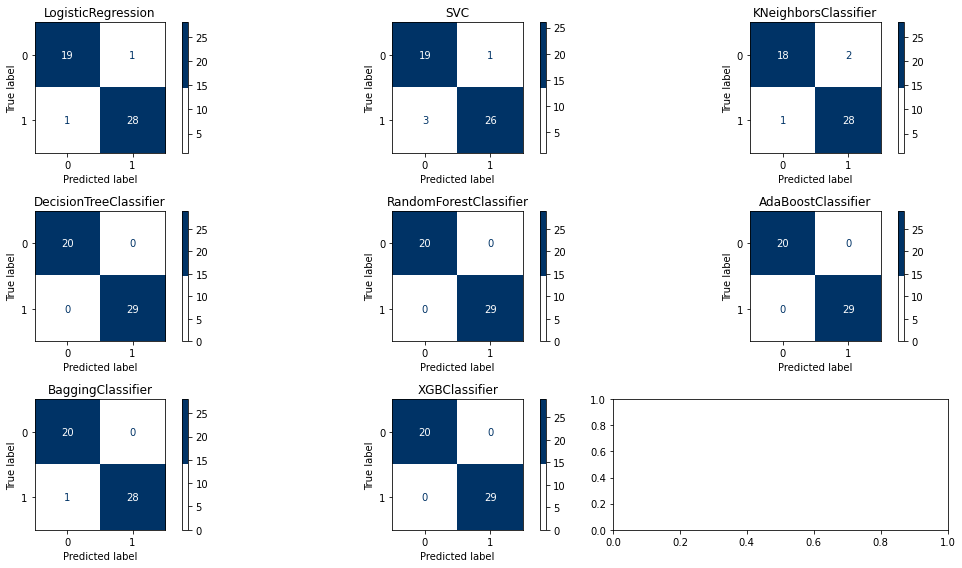

In [13]:
cmap = ListedColormap(["#FFFFFF","#003366"])
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap= cmap,   
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

# 6. Tuning Hyper-parameters

In [14]:
## Model Parameters
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },   
    'decision_tree' : {
        'model': DecisionTreeClassifier(criterion='gini',
                             max_depth=16, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=None,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             class_weight=None, 
                             ccp_alpha=0.0),
        'params': {
            'splitter': ['best','random'],
            'criterion':['gini','entropy']
        }
    }    

}

### 6.1 Tuning GridSearch Method

In [15]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    gs =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    gs.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
    
model_comp = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_comp

,model,best_score,best_params
0,svm,0.964103,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.958974,{'n_estimators': 1}
2,logistic_regression,0.964103,{'C': 10}
3,decision_tree,0.964103,"{'criterion': 'entropy', 'splitter': 'best'}"


## 6.2 Random Forest classifier Tuning

In [16]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_forest = RandomForestClassifier()
random_fc= RandomizedSearchCV(random_forest, params, cv = 10,n_jobs = -1)
random_fc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]})

In [17]:
best_fc = random_fc.best_estimator_
score=best_fc.score(X_test,y_test)
bestfc_pred = best_fc.predict(X_test)
cr = classification_report(y_test,bestfc_pred)
print("Best Model Slection")
print()
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Best Model Slection

Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        29

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



## 6.3 XGboost classifier Tuning

In [18]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
xgb=XGBClassifier()
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train, y_train).best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.1111111111111112, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=50, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [19]:
best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test,y_test)
bestxgb_pred = best_xgb.predict(X_test)
cr = classification_report(y_test,bestxgb_pred)
print("XGB Model:")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGB Model:
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.93      0.96        29

    accuracy                           0.96        49
   macro avg       0.95      0.97      0.96        49
weighted avg       0.96      0.96      0.96        49



# 7. Fetaure Selection for Model Deployment

In [20]:
feature_importances = Random_xgb.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
5,DMC,0.474223
8,FWI,0.338187
4,FFMC,0.060863
6,DC,0.053239
0,Temperature,0.032213
7,ISI,0.021501
2,Ws,0.016112
3,Rain,0.003662
1,RH,0.000000


Text(0, 0.5, 'Features')

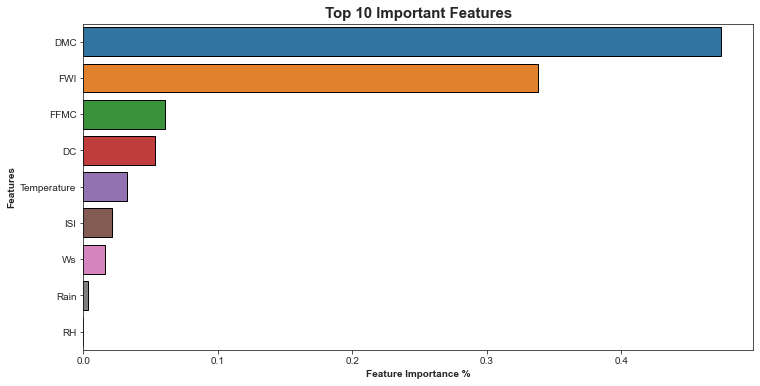

In [21]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

# 8. Model Deployment after Fine Tuning XGBoost Model

In [25]:
Xtrain_new = X_train.drop(['RH'], axis=1)
Xtest_new = X_test.drop(['RH'], axis=1)

In [26]:
xgb_model =Random_xgb.fit(Xtrain_new, y_train).best_estimator_
xgb_model.score(Xtest_new, y_test)
xgb_model_pred = xgb_model.predict(Xtest_new)
cr = classification_report(y_test, xgb_model_pred)
print("XGB Model Selection:")
print()
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGB Model Selection:

Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        29

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [27]:
import bz2,pickle
file = bz2.BZ2File('classification.pkl','wb')
pickle.dump(xgb_model,file)
file.close()